# Emotion recognition- RAVDESS dataset

In [399]:
# https://sail.usc.edu/iemocap/

### MFCCS- mel- frequency cepstrum coefficients

### Computing the cepstrum:

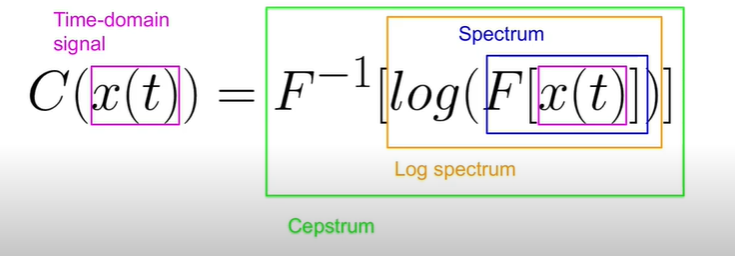

### We're basically trasforming our sound wave to an absolute formation, then create a log which allows us to see the signal's Frequency VS it's Magnitude and allows us to examine periodicities and general trend as well. Lastly were performing an inverse transformation which results in a general spectrum of the signal (Quefrency VS Magnitude).

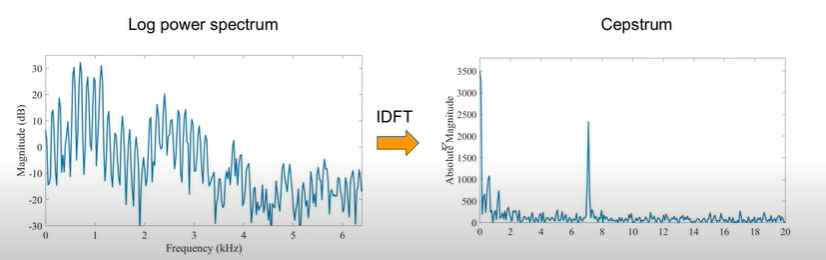

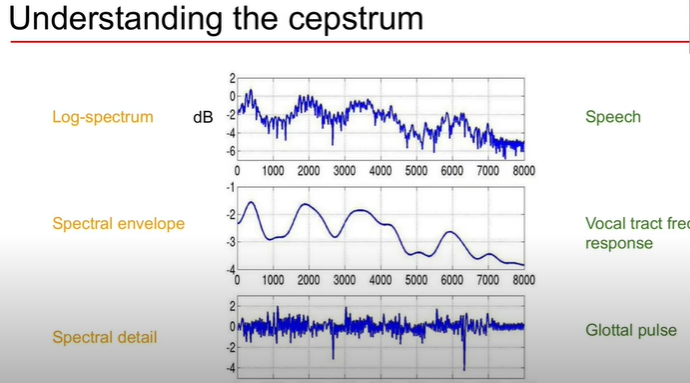

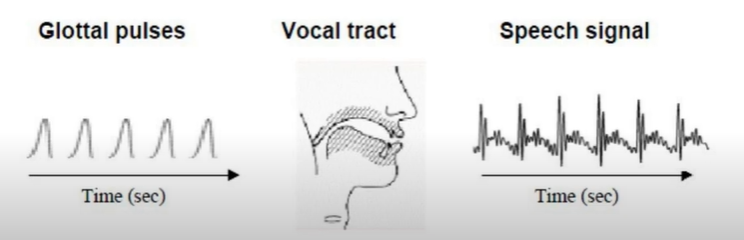

### Speech = Convolution of vocal tract frequency response and Glottal pulse.

### We are mostly interested in the Vocal tract, which contains the main knowledge that helps us understand our data (formants), and therefore we're looking for a way to seperate the Vocal tract from the Speech wave without having the Glottal pulse as well. We do that by applying a logarithm on the amplitude (audio is perceived logarithmically and not linearly), mel-scaling, and then a transformation (Discrete cosine transform).

### Our result- the waves coefficients! (MFCCS)

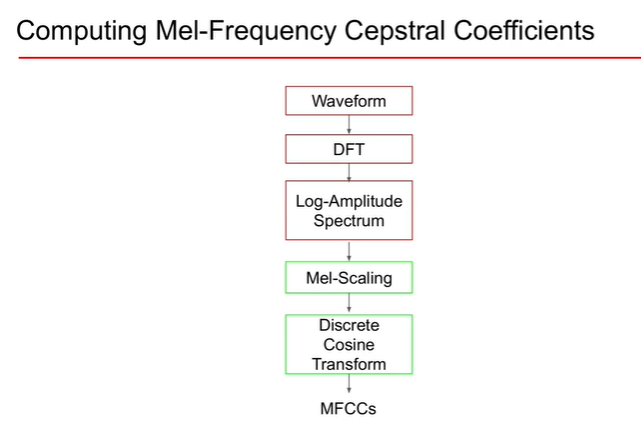

### File Summary

#### In total, the RAVDESS collection includes 7356 files (2880+2024+1440+1012 files).

#### File naming convention

##### Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics: 

#### Filename identifiers 

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

  Filename example: 02-01-06-01-02-01-12.mp4 

* Video-only (02)
* Speech (01)
* Fearful (06)
* Normal intensity (01)
* Statement "dogs" (02)
* 1st Repetition (01)
* 12th Actor (12)
* Female, as the actor ID number is even.

## Import libraries

In [ ]:
import os
import librosa
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import IPython.display as ipd
import librosa.display
import numpy as np

## Import data from the files

In [64]:
lst = []
path = 'C:\\Users\\mary-\\PycharmProjects\\emotion\\Emotion_Recognition\\data'
emotion = []
voc_channel = []
full_path = []
modality = []
intensity = []
actors = []
phrase =[]

for root, dirs, files in tqdm(os.walk(path)):
    for file in files:
        try:
            #Load librosa array, obtain mfcss, store the file and the mfcss information in a new array
            X, sample_rate = librosa.load(os.path.join(root,file), res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
            # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
            # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
           
            modal = int(file[1:2])
            vchan = int(file[4:5])
            lab = int(file[7:8])
            ints = int(file[10:11])
            phr = int(file[13:14])
            act = int(file[19:20])
            
            arr = mfccs, lab
            lst.append(arr)
            
            modality.append(modal)
            voc_channel.append(vchan)
            emotion.append(lab) #only labels
            intensity.append(ints)
            phrase.append(phr)
            actors.append(act)
            
            full_path.append((root, file)) # only files
          # If the file is not valid, skip it
        except ValueError:
            continue

In [58]:
n_files = len(paths)
n_files

2452

# EDA

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

## Decrypting of the file names

In [127]:
# 01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised
emotions_list = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
emotion_dict = {em[0]+1:em[1] for em in enumerate(emotions_list)}

df = pd.DataFrame([emotion, voc_channel, modality, intensity, actors, phrase, full_path]).T
df.columns = ['emotion', 'voc_channel', 'modality', 'intensity', 'actors', 'phrase', 'path']
df['emotion'] = df['emotion'].map(emotion_dict)
df['voc_channel'] = df['voc_channel'].map({1: 'speech', 2:'song'})
df['modality'] = df['modality'].map({1: 'full AV', 2:'video only', 3:'audio only'})
df['intensity'] = df['intensity'].map({1: 'normal', 2:'strong'})
df['actors'] = df['actors'].apply(lambda x: 'female' if x%2 == 0 else 'male')
df['phrase'] = df['phrase'].map({1: 'Kids are talking by the door', 2:'Dogs are sitting by the door'})
df['path'] = df['path'].apply(lambda x: x[0] + '\\' + x[1])

df.head()

,emotion,voc_channel,modality,intensity,actors,phrase,path
0,neutral,speech,audio only,normal,male,Kids are talking by the door,C:\Users\mary-\PycharmProjects\emotion\Emotion...
1,neutral,speech,audio only,normal,male,Kids are talking by the door,C:\Users\mary-\PycharmProjects\emotion\Emotion...
2,neutral,speech,audio only,normal,male,Dogs are sitting by the door,C:\Users\mary-\PycharmProjects\emotion\Emotion...
3,neutral,speech,audio only,normal,male,Dogs are sitting by the door,C:\Users\mary-\PycharmProjects\emotion\Emotion...
4,calm,speech,audio only,normal,male,Kids are talking by the door,C:\Users\mary-\PycharmProjects\emotion\Emotion...


## Analysis of the dataframe

In [84]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   emotion      2452 non-null   object
 1   voc_channel  2452 non-null   object
 2   modality     2452 non-null   object
 3   intensity    2452 non-null   object
 4   actors       2452 non-null   object
 5   phrase       2452 non-null   object
 6   path         2452 non-null   object
dtypes: object(7)
memory usage: 134.2+ KB


None

In [71]:
for col in ['emotion', 'voc_channel', 'modality', 'intensity', 'actors', 'phrase']:
    print('\nColumn values for ', col.upper())
    print(df[col].value_counts())


Column values for  EMOTION
angry        376
happy        376
fearful      376
calm         376
sad          376
surprised    192
disgust      192
neutral      188
Name: emotion, dtype: int64

Column values for  VOC_CHANNEL
speech    1440
song      1012
Name: voc_channel, dtype: int64

Column values for  MODALITY
audio only    2452
Name: modality, dtype: int64

Column values for  INTENSITY
normal    1320
strong    1132
Name: intensity, dtype: int64

Column values for  ACTORS
male      1248
female    1204
Name: actors, dtype: int64

Column values for  PHRASE
Dogs are sitting by the door    1226
Kids are talking by the door    1226
Name: phrase, dtype: int64


In [92]:
names= data['actors'].value_counts().index
values= data['actors'].value_counts().values
names, values

(Index(['female', 'male'], dtype='object'), array([96, 96], dtype=int64))

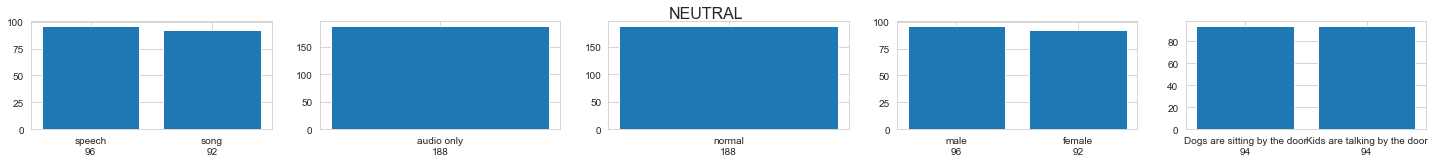

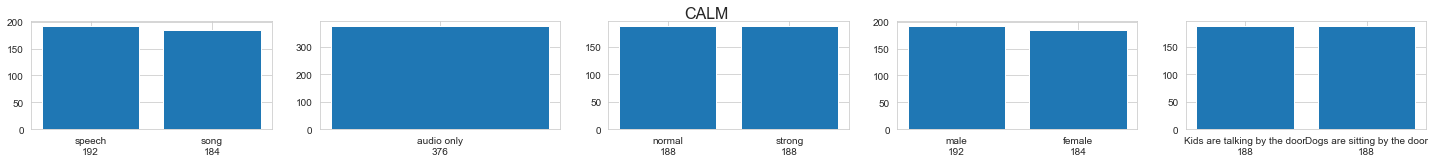

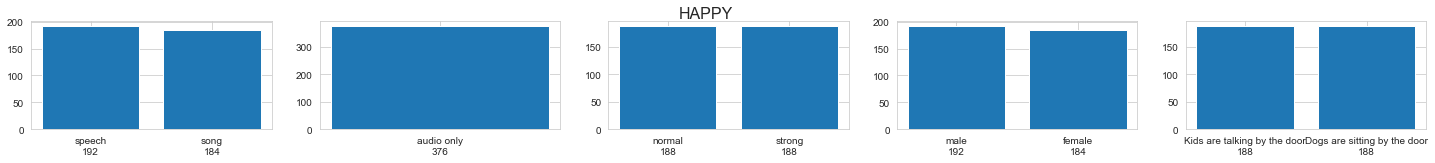

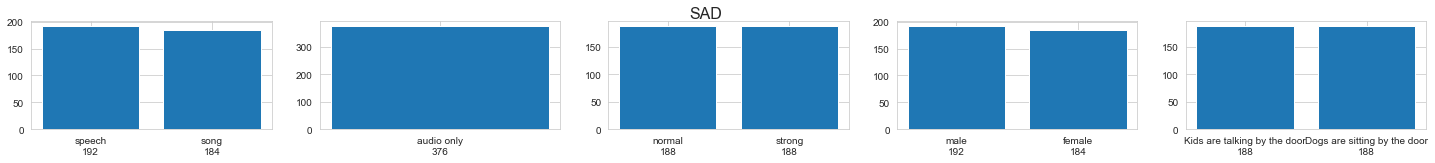

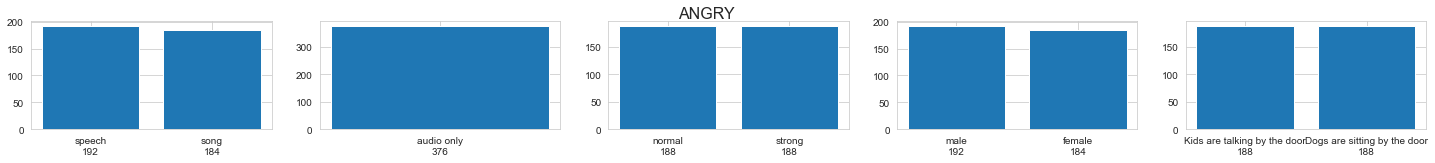

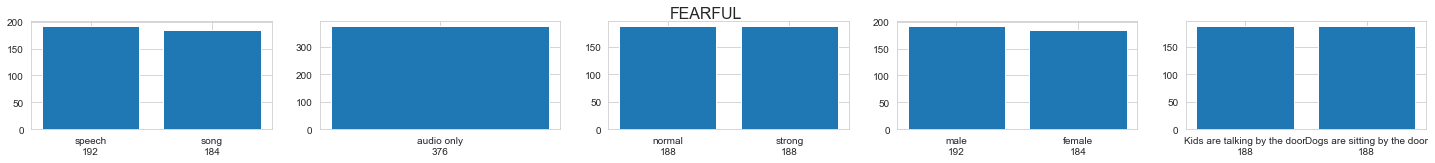

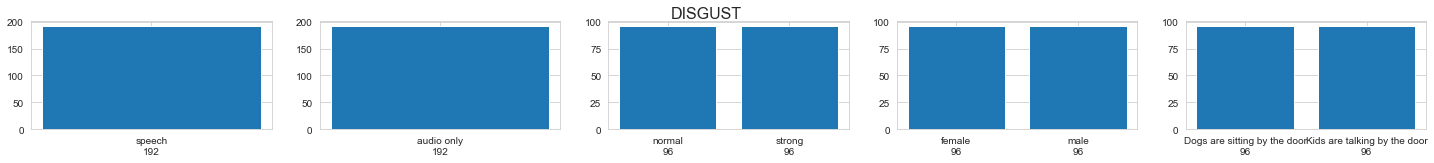

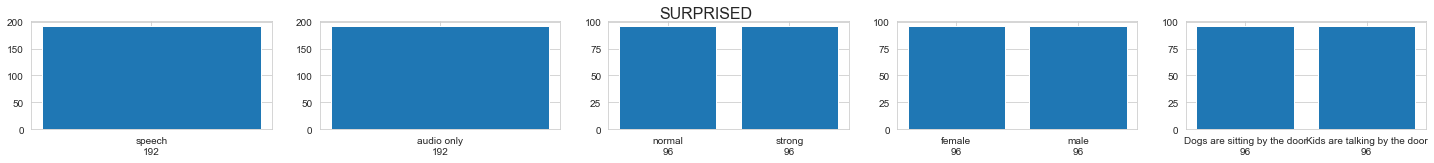

In [105]:
for emotion_ in emotions_list:
    pdata = df.loc[df.emotion == emotion_]
    fig, axs = plt.subplots(1, 5, figsize=(25, 2))
    fig.suptitle(emotion_.upper(), size=16)
    for i, col in enumerate(['voc_channel', 'modality', 'intensity', 'actors', 'phrase']):
        names= pdata[col].value_counts().index
        values= pdata[col].value_counts().values
        names = [n[0]+'\n'+str(n[1]) for n in zip(names,values)]
        axs[i].bar(names, values)
        

In [128]:
df_m = df[['emotion', 'voc_channel', 'intensity', 'actors', 'phrase', 'path']]
df_m = df_m.loc[(df.voc_channel == 'speech') & (df.actors == 'male')]
df_m = df_m.drop(['voc_channel', 'actors'], axis=1)
df_m.head()

,emotion,intensity,phrase,path
0,neutral,normal,Kids are talking by the door,C:\Users\mary-\PycharmProjects\emotion\Emotion...
1,neutral,normal,Kids are talking by the door,C:\Users\mary-\PycharmProjects\emotion\Emotion...
2,neutral,normal,Dogs are sitting by the door,C:\Users\mary-\PycharmProjects\emotion\Emotion...
3,neutral,normal,Dogs are sitting by the door,C:\Users\mary-\PycharmProjects\emotion\Emotion...
4,calm,normal,Kids are talking by the door,C:\Users\mary-\PycharmProjects\emotion\Emotion...


In [142]:
def plot_speech(fname, ind, axis):
    # use the Librosa library to load and plot the random speech
    data, sampling_rate = librosa.load(fname)
    plt.figure(figsize=(15, 5))
    librosa.display.waveplot(data, sr=sampling_rate, alpha=.2, ax = axis)
#     plt.show()

<ipython-input-142-f129fd9088ff>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 5))


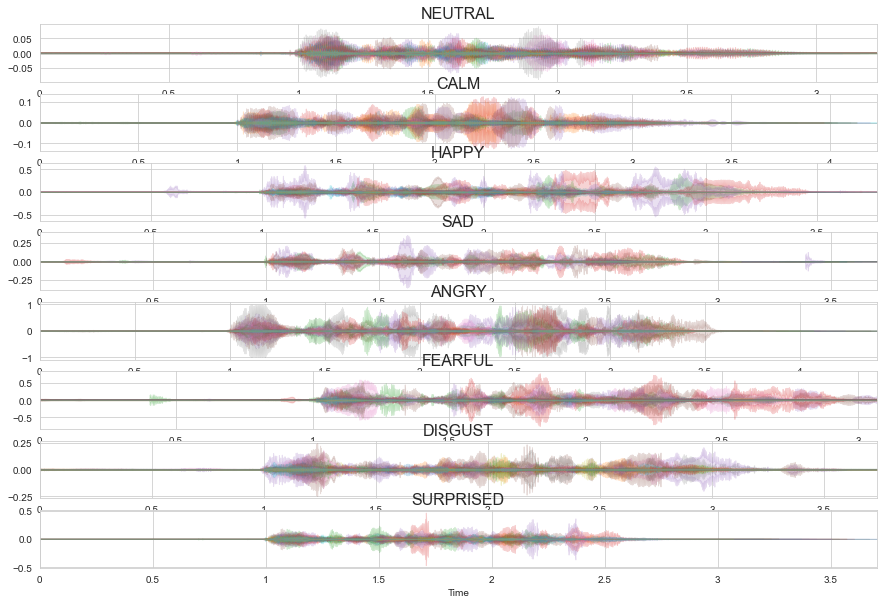

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [154]:
fig, ax = plt.subplots(len(emotions_list), 1, figsize=(15, 10))
for n, emotion_ in enumerate(emotions_list):
    pdata = df_m.loc[df_m.emotion == emotion_]
    for i, speech_file in enumerate(pdata.path.values[:20]):
        plot_speech(speech_file, i, ax[n])
    ax[n].set_title(emotion_.upper(), size=16)
plt.show();
plt.savefig('emotions.png');

In [305]:
# for n, emotion_ in enumerate(emotions_list):
#     fig, ax = plt.subplots(1, 1, figsize=(15, 2));
#     pdata = df_m.loc[df_m.emotion == emotion_]
#     for i, speech_file in enumerate(pdata.path.values[:10]):
#         plot_speech(speech_file, i, ax);
#     ax.set_title(emotion_.upper(), size=16);
#     plt.show();
#     pass

## Random sample

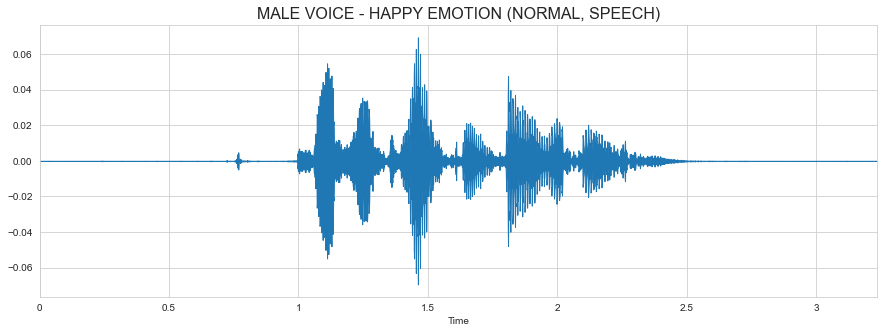

In [307]:
# choose random number
rnd = np.random.randint(0,n_files)

# use the Librosa library to load and plot the random speech
fname = paths[rnd][0] + '\\' + paths[rnd][1] 
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
info = df.iloc[rnd].values
title_txt = f'{info[4]} voice - {info[0]} emotion ({info[3]}, {info[1]})'
plt.title(title_txt.upper(), size=16)
librosa.display.waveplot(data, sr=sampling_rate)

# play the audio 
ipd.Audio(fname)

## Conclusion

* Sound quality is good. There are more male voices than female voices, but in generall the dataset is well-balanced.

* Since two emotions (disgust & surprised) don't have a 'song' format, probably it will be better to use for our model only a 'speech' format.

* From reading a few blogs and articles, it seems female has a higher pitch that male. So if we don't tag the gender label to the audio file, it won't be able to detect anger or fear if it was a male speaker. It will just get bucketed into neutral.



In [352]:
X, y = zip(*lst)

In [353]:
X = np.asarray(X)
y = np.asarray(y)

X.shape, y.shape

((2452, 40), (2452,))

# BASELINE MODEL

### At this point, we can perform a normal classification, using our mfccs coefficients as our features.

### We'll start by running a Logistic regression model.

In [354]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, \
                                                    random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=300).fit(X_train, y_train)
y_pred = clf.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.57      0.53      0.55        38
           2       0.51      0.58      0.54        81
           3       0.54      0.47      0.50        73
           4       0.45      0.58      0.50        71
           5       0.63      0.64      0.63        69
           6       0.61      0.53      0.56        80
           7       0.41      0.38      0.40        45
           8       0.39      0.32      0.35        34

    accuracy                           0.52       491
   macro avg       0.51      0.50      0.50       491
weighted avg       0.52      0.52      0.52       491



### Running RandomForest:

In [12]:
from sklearn.ensemble import RandomForestClassifier

reg = RandomForestClassifier()
reg.fit(X_train, y_train)
y_pred2 = reg.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.83      0.76      0.79        38
           2       0.71      0.89      0.79        81
           3       0.83      0.62      0.71        73
           4       0.60      0.61      0.60        71
           5       0.74      0.83      0.78        69
           6       0.73      0.65      0.69        80
           7       0.56      0.56      0.56        45
           8       0.56      0.59      0.57        34

    accuracy                           0.70       491
   macro avg       0.69      0.69      0.69       491
weighted avg       0.70      0.70      0.70       491



### Running NN

In [159]:
def extract_features(file_name):
    
    # Sets the name to be the path to where the file is in my computer
#     file_name = os.path.join(os.path.abspath('voice')+'/'+str(files.file))

    # Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

    # Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)

    # Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))

    # Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

    # Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

    # Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)

    # Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
        
    
    # We add also the classes of each file as a label at the end
#     label = files.label

    return mfccs, chroma, mel, contrast, tonnetz

In [163]:
extracted_f = [extract_features(f) for f in df.iloc[:, 6]]
df_features = pd.DataFrame(extracted_f)
df_features.columns = ['mfccs', 'chroma', 'mel', 'contrast', 'tonnetz']
df_features.head()

C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1012
  warnings.warn(


,mfccs,chroma,mel,contrast,tonnetz
0,"[-700.3989, 58.63021, -3.025852, 16.040241, 4....","[0.7705136, 0.7919621, 0.7450207, 0.7132563, 0...","[1.3591023e-06, 5.603021e-05, 0.003625807, 0.0...","[19.170806426678908, 11.228592587876904, 14.93...","[-0.039934110869118286, 0.021886365025894902, ..."
1,"[-695.55786, 59.240154, -5.3727765, 19.776365,...","[0.75262713, 0.76244515, 0.705323, 0.6708979, ...","[1.9226525e-06, 7.980164e-05, 0.0034158083, 0....","[19.703529904089212, 12.061346404195335, 15.66...","[-0.09936735549581666, 0.03599189841254454, -0..."
2,"[-694.00433, 61.49651, -3.2627437, 16.971298, ...","[0.78342175, 0.79569024, 0.7620961, 0.7395729,...","[3.2158696e-06, 6.161674e-05, 0.003450485, 0.0...","[18.821566636526, 12.208752255412646, 14.87736...","[-0.043947456043641066, 0.0004260252282557473,..."
3,"[-687.51337, 59.44154, -0.7037136, 16.645708, ...","[0.78287345, 0.7402927, 0.70673174, 0.71550256...","[2.4198505e-06, 7.043581e-05, 0.0059497827, 0....","[20.481717580247285, 11.763975991713151, 15.67...","[-0.05272776055929819, 0.014946831601470955, -..."
4,"[-729.98016, 66.51589, -0.9419845, 19.070974, ...","[0.70614356, 0.7494246, 0.7474101, 0.6949273, ...","[2.4056344e-06, 3.908024e-05, 0.0012831008, 0....","[18.47831078405666, 11.246394579333884, 15.137...","[-0.07280013000692863, 0.016505810539127103, 0..."


In [165]:
# save dataframes
df_features.to_csv('features.csv')
df.to_csv('files.csv')

In [ ]:
# concatenate features for to feed the model
features = []
for i, f in enumerate(extracted_f):
    features.append(np.concatenate((extracted_f[i][0], extracted_f[i][1], 
                extracted_f[i][2], extracted_f[i][3],
                extracted_f[i][4]), axis=0))
    
# features[0]

In [471]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(features, df.emotion, test_size=0.20, \
                                                    random_state=42)

In [396]:
from sklearn import metrics

def report_res_and_plot_matrix(y_test, y_pred, class_names):

  #report metrics
  acc = metrics.accuracy_score(y_test, y_pred)
  print(f"Accuracy: {acc:.4f}")
  print(f"Classes: {class_names}")

  #plot matrix
  cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots()
    
  tick_marks = np.arange(len(class_names))
  plt.xticks(ticks=tick_marks, labels=class_names, rotation=90)
  plt.yticks(ticks=tick_marks, labels=class_names, rotation=90)

  group_counts = [f'{value:0.0f}' for value in cnf_matrix.flatten()]
  group_percentages = [f'{100 * value:0.1f} %' for value in 
                       cnf_matrix.flatten()/np.sum(cnf_matrix)]
  labels = [f'{v1}\n({v2})' for v1, v2 in
            zip(group_counts,group_percentages)]
  n = int(np.sqrt(len(labels)))
  labels = np.asarray(labels).reshape(n,n)
  sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.xaxis.set_label_position("bottom")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()

  # return metrics
  return [acc, cnf_matrix]

In [472]:
# check performance with RF classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline

rf = RandomForestClassifier(n_estimators=425)
sc = StandardScaler()
le = LabelEncoder()
p = make_pipeline(sc, rf)

p.fit(X_train, y_train)
y_pred3 = p.predict(X_test)

print(p.score(X_test, y_test))
print(classification_report(y_test, y_pred3))

# accuracy is lower than when we use only mfcc parameter

0.6761710794297352
              precision    recall  f1-score   support

       angry       0.76      0.77      0.76        69
        calm       0.66      0.94      0.77        81
     disgust       0.62      0.58      0.60        45
     fearful       0.69      0.61      0.65        80
       happy       0.69      0.51      0.58        73
     neutral       0.90      0.71      0.79        38
         sad       0.62      0.63      0.63        71
   surprised       0.53      0.56      0.54        34

    accuracy                           0.68       491
   macro avg       0.68      0.66      0.67       491
weighted avg       0.68      0.68      0.67       491



Accuracy: 0.6762
Classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


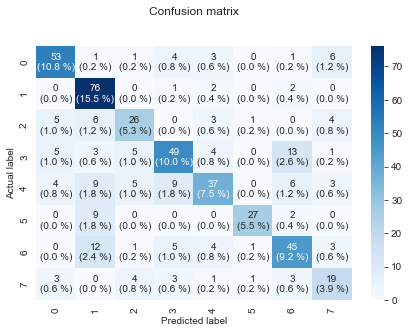

In [473]:
params0 = report_res_and_plot_matrix(y_test, y_pred3, rf.classes_)

In [337]:
# try to check performance only for male voice
mask = df.loc[(df.actors == 'male')].index
X2 = np.array(features)[mask]
y2 = df.emotion[mask]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, \
                                                    random_state=42)
X2.shape, y2.shape 

# 68% with base nn model

((720, 193), (720,))

In [331]:
# try to check performance only for speech
mask = df.loc[df.voc_channel == 'speech'].index
X3 = np.array(features)[mask]
y3 = df.emotion[mask]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, \
                                                    random_state=42)
X3.shape, y3.shape 

# 65% with base nn model

((1440, 193), (1440,))

In [332]:
# !pip install livelossplot

In [467]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv1D, AveragePooling1D
from livelossplot import PlotLossesKeras
tf.config.list_physical_devices('GPU')

# build base model1
model = tf.keras.Sequential()

model.add(Dense(193, input_shape=(193,), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.05))  
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))    
model.add(Dense(8, activation = 'softmax'))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# set callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=1)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='weights.hdf5', save_weights_only=True, 
                                                      monitor='val_accuracy', mode='max', save_best_only=True)

model.summary()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_183 (Dense)            (None, 193)               37442     
_________________________________________________________________
dropout_134 (Dropout)        (None, 193)               0         
_________________________________________________________________
dense_184 (Dense)            (None, 128)               24832     
_________________________________________________________________
dropout_135 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_185 (Dense)            (None, 128)               16512     
_________________________________________________________________
dropout_136 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_186 (Dense)            (None, 8)               

In [423]:
input_shape

(193, 1)

In [456]:
from tensorflow.keras.layers import Reshape, Flatten

# build base model2
model2 = tf.keras.Sequential()
input_shape = (X_train_.shape[1], )
model2.add(Reshape(input_shape + (1, ), input_shape=input_shape))
# model2.add(Dropout(0.1))
model2.add(Conv1D(256, kernel_size=(10), activation='relu'))
model2.add(AveragePooling1D(pool_size=(16)))
model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.2))  
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.1))    
model2.add(Dense(8, activation = 'softmax'))

model2.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# set callbacks
early_stop2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, verbose=1)
model_checkpoint2 = tf.keras.callbacks.ModelCheckpoint(filepath='weights2.hdf5', save_weights_only=True, 
                                                      monitor='val_accuracy', mode='max', save_best_only=True)

model2.summary()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_10 (Reshape)         (None, 193, 1)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 184, 256)          2816      
_________________________________________________________________
average_pooling1d_13 (Averag (None, 11, 256)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2816)              0         
_________________________________________________________________
dense_176 (Dense)            (None, 128)               360576    
_________________________________________________________________
dropout_129 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_177 (Dense)            (None, 128)             

In [249]:
# original dataset
X_train_ = sc.fit_transform(X_train)
y_train_ = le.fit_transform(y_train)
X_test_ = sc.transform(X_test)
y_test_ = le.transform(y_test)
set(y_train_), X_train_.shape, y_train_.shape

({0, 1, 2, 3, 4, 5, 6, 7}, (1961, 193), (1961,))

In [338]:
# for male voice
X_train2_ = sc.fit_transform(X_train2)
y_train2_ = le.fit_transform(y_train2)
X_test2_ = sc.transform(X_test2)
y_test2_ = le.transform(y_test2)
set(y_train2_), X_train2_.shape, y_train2_.shape

({0, 1, 2, 3, 4, 5, 6, 7}, (576, 193), (576,))

In [334]:
# for speech
X_train3_ = sc.fit_transform(X_train3)
y_train3_ = le.fit_transform(y_train3)
X_test3_ = sc.transform(X_test3)
y_test3_ = le.transform(y_test3)
set(y_train3_), X_train3_.shape, y_train3_.shape

({0, 1, 2, 3, 4, 5, 6, 7}, (1152, 193), (1152,))

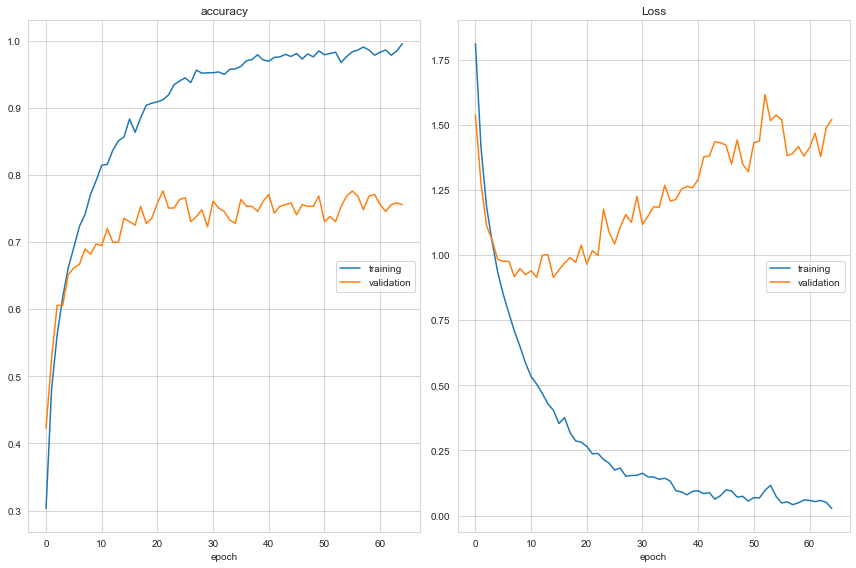

accuracy
	training         	 (min:    0.303, max:    0.996, cur:    0.996)
	validation       	 (min:    0.422, max:    0.776, cur:    0.756)
Loss
	training         	 (min:    0.027, max:    1.811, cur:    0.027)
	validation       	 (min:    0.914, max:    1.616, cur:    1.520)
Epoch 00065: early stopping


In [468]:
history = model.fit(X_train_, y_train_, batch_size=64, epochs=400, validation_split=0.2, 
                    callbacks=[early_stop, model_checkpoint, PlotLossesKeras()])

In [469]:
# load the best weights
model.load_weights('weights.hdf5')
y_pred = model.predict(X_test_).argmax(axis=1)
print(classification_report(y_test_, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        69
           1       0.84      0.72      0.77        81
           2       0.51      0.60      0.55        45
           3       0.79      0.69      0.73        80
           4       0.71      0.70      0.70        73
           5       0.72      0.68      0.70        38
           6       0.63      0.72      0.67        71
           7       0.56      0.68      0.61        34

    accuracy                           0.70       491
   macro avg       0.69      0.69      0.69       491
weighted avg       0.71      0.70      0.70       491



Accuracy: 0.6965
Classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


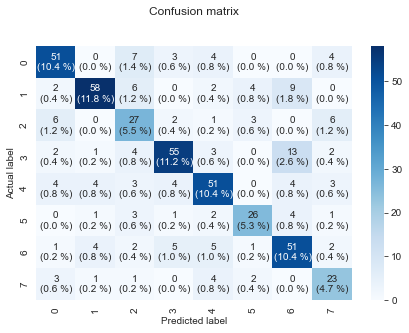

In [470]:
params = report_res_and_plot_matrix(y_test_, y_pred, le.classes_)

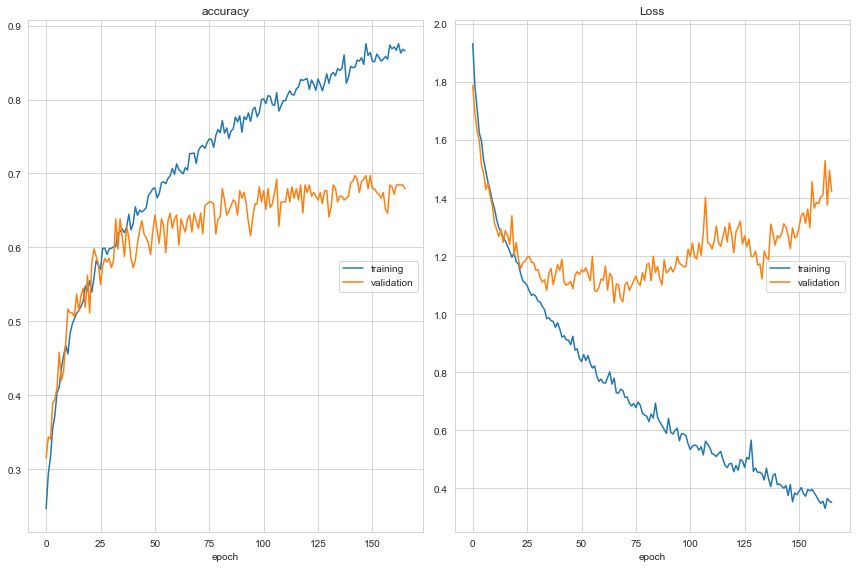

accuracy
	training         	 (min:    0.247, max:    0.876, cur:    0.866)
	validation       	 (min:    0.316, max:    0.697, cur:    0.679)
Loss
	training         	 (min:    0.331, max:    1.933, cur:    0.352)
	validation       	 (min:    1.039, max:    1.789, cur:    1.422)
Epoch 00166: early stopping


In [460]:
history2 = model2.fit(X_train_, y_train_, batch_size=64, epochs=400, validation_split=0.2, 
                    callbacks=[early_stop2, model_checkpoint2, PlotLossesKeras()])

In [461]:
model2.load_weights('weights2.hdf5')
y_pred = model2.predict(X_test_).argmax(axis=1)
print(classification_report(y_test_, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.81      0.69        69
           1       0.69      0.77      0.73        81
           2       0.57      0.47      0.51        45
           3       0.70      0.57      0.63        80
           4       0.66      0.51      0.57        73
           5       0.62      0.68      0.65        38
           6       0.65      0.62      0.63        71
           7       0.54      0.62      0.58        34

    accuracy                           0.64       491
   macro avg       0.63      0.63      0.62       491
weighted avg       0.64      0.64      0.63       491



Accuracy: 0.6375
Classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


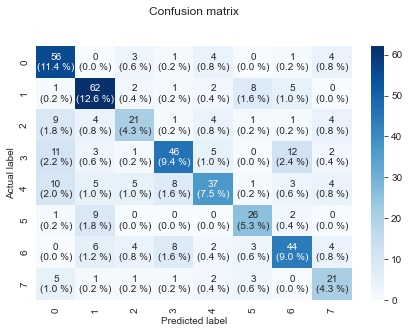

In [462]:
params2 = report_res_and_plot_matrix(y_test_, y_pred, le.classes_)

# UNSUPERVISED LEARNING - CLUSTERING

In [503]:
import warnings
warnings.filterwarnings("ignore")

In [495]:
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm

data = np.array(features)
mask = df.loc[df.voc_channel == 'speech'].index
data = data[mask]
wcss = []
for k in tqdm(range(1,20)):
  km = KMeans(k)
  km.fit(data)
  wcss.append([k,km.inertia_])
  
wcss = np.array(wcss)

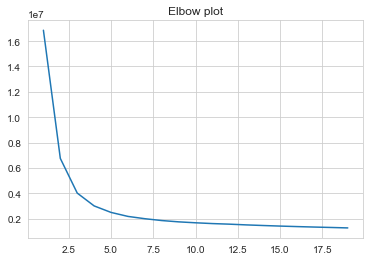

In [496]:
plt.plot(wcss[:,0], wcss[:, 1])
plt.title('Elbow plot')
plt.show()

In [504]:
km = KMeans(4)
labels = km.fit_predict(data)
df_view = df.iloc[mask]
df_view['label'] = labels
df_view.head()

,emotion,voc_channel,modality,intensity,actors,phrase,path,label
0,neutral,speech,audio only,normal,male,Kids are talking by the door,C:\Users\mary-\PycharmProjects\emotion\Emotion...,2
1,neutral,speech,audio only,normal,male,Kids are talking by the door,C:\Users\mary-\PycharmProjects\emotion\Emotion...,2
2,neutral,speech,audio only,normal,male,Dogs are sitting by the door,C:\Users\mary-\PycharmProjects\emotion\Emotion...,2
3,neutral,speech,audio only,normal,male,Dogs are sitting by the door,C:\Users\mary-\PycharmProjects\emotion\Emotion...,2
4,calm,speech,audio only,normal,male,Kids are talking by the door,C:\Users\mary-\PycharmProjects\emotion\Emotion...,2


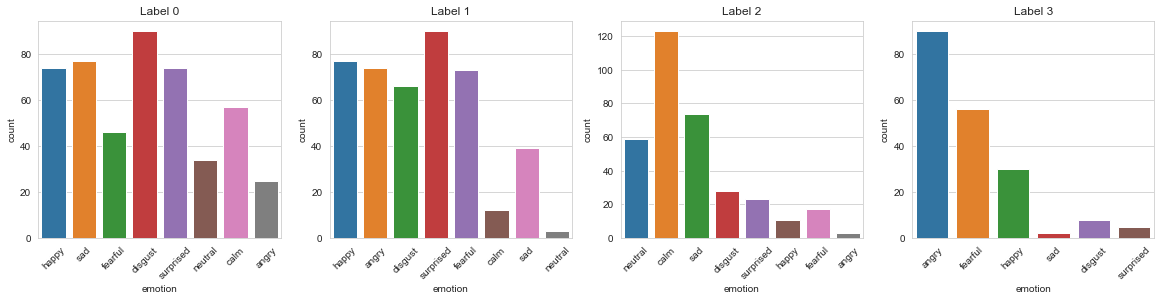

In [505]:
fig, ax = plt.subplots(1, len(set(labels)), figsize=(20,4))
for lab in set(labels):
  ax[lab].set_title(f'Label {lab}')
  sns.countplot(df_view[df_view['label']==lab]['emotion'], ax=ax[lab])
  ax[lab].set_xticklabels(ax[lab].get_xticklabels(), rotation=45)
plt.show()

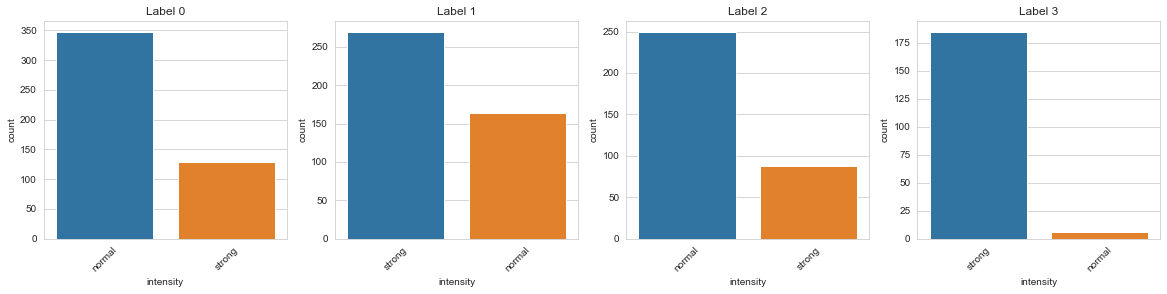

In [509]:
fig, ax = plt.subplots(1, len(set(labels)), figsize=(20,4))
for lab in set(labels):
  ax[lab].set_title(f'Label {lab}')
  sns.countplot(df_view[df_view['label']==lab]['intensity'], ax=ax[lab])
  ax[lab].set_xticklabels(ax[lab].get_xticklabels(), rotation=45)
plt.show()